In [1]:
import pandas as pd
import numpy as np
from scipy.special import comb

def fixed_parameters_negative_binomial(dataset_size, r, p):
    random_numbers = []
    for _ in range(dataset_size):
        probabilities = [comb(k + r - 1, k) * (p * r) * ((1 - p) * k) for k in range(r)]
        random_numbers.append(probabilities)
    return random_numbers

def random_intercept_negative_binomial(dataset_size, mu_values, sigma_values, r):
    random_numbers = []
    for i in range(dataset_size):
        mu = mu_values[i]
        sigma = sigma_values[i]
        p_i = 1 / (1 + np.exp(-(mu + sigma)))
        probabilities = [comb(k + r - 1, k) * (p_i * r) * ((1 - p_i) * k) for k in range(r)]
        random_numbers.append(probabilities)
    return random_numbers

def uncorrelated_random_parameters_negative_binomial(dataset_size, r_values, p_values, r):
    random_numbers = []
    for i in range(dataset_size):
        p_i = p_values[i]
        probabilities = [comb(k + r_values[i] - 1, k) * (p_i * r_values[i]) * ((1 - p_i) * k) for k in range(r)]
        random_numbers.append(probabilities)
    return random_numbers

def correlated_random_parameters_negative_binomial(dataset_size, mu_values, sigma_values, r):
    random_numbers = []
    for i in range(dataset_size):
        mu = mu_values[i]
        sigma = sigma_values[i]
        p_i = 1 / (1 + np.exp(-(mu + sigma)))
        probabilities = [comb(k + r - 1, k) * (p_i * r) * ((1 - p_i) * k) for k in range(r)]
        random_numbers.append(probabilities)
    return random_numbers

# Parameters
dataset_size = 100
r = 5  # Number of failures until the experiment is stopped
p = 0.3  # Probability of success in each trial
mu_values = np.random.normal(10, 2, size=dataset_size)
sigma_values = mu_values * 0.2
r_values = np.random.randint(1, 10, size=dataset_size)
p_values = np.random.uniform(0.1, 0.5, size=dataset_size)

# Applying different types of negative binomial distributions based on conditions
distribution_type = "fixed_parameters"
if distribution_type == "fixed_parameters":
    random_numbers = fixed_parameters_negative_binomial(dataset_size, r, p)
elif distribution_type == "random_intercept":
    random_numbers = random_intercept_negative_binomial(dataset_size, mu_values, sigma_values, r)
elif distribution_type == "uncorrelated_random_parameters":
    random_numbers = uncorrelated_random_parameters_negative_binomial(dataset_size, r_values, p_values, r)
elif distribution_type == "correlated_random_parameters":
    random_numbers = correlated_random_parameters_negative_binomial(dataset_size, mu_values, sigma_values, r)

def read_csv_file(csv_file):
    try:
        df = pd.read_csv(csv_file)
        return df
    
    except Exception as e:
        print(f"Error occurred: {str(e)}")
        return None

csv_file = "base_ESP B.csv"
dataframe = read_csv_file(csv_file)


In [2]:
if dataframe is not None:
    print("First few rows of the DataFrame:")
    print(dataframe)

First few rows of the DataFrame:
    PROVINCIA   aab  SUPERFICIE  DESEMPLEO  PRECIPIT   VE TO  VE MO     POP  \
0     Almeria  2006        8775     9.2650     275.5  431491  29564  646633   
1     Almeria  2007        8775    11.4450     210.2  455500  32981  667635   
2     Almeria  2008        8775    19.3925     203.2  465167  35216  684426   
3     Almeria  2009        8775    26.5725     261.7  467857  36337  695560   
4     Almeria  2010        8775    28.0125     360.7  471693  37181  702819   
..        ...   ...         ...        ...       ...     ...    ...     ...   
555  La Rioja  2014        5045    18.1600     426.9  197430  14229  317053   
556  La Rioja  2015        5045    15.3825     435.0  199003  14832  315794   
557  La Rioja  2016        5045    13.5350     376.9  203158  15439  315381   
558  La Rioja  2017        5045    11.9925     391.0  207545  15974  315675   
559  La Rioja  2018        5045    10.4025     533.3  212115  16633  316798   

          MOTOR  C

In [3]:
from scipy.optimize import minimize

# Define the equation to be analyzed
def equation(x, a, b):
    return a * x + b

# Generate sample data
np.random.seed(0)
x_data = np.linspace(0, 10, 100)
y_data = 2 * x_data + 3 + np.random.normal(0, 1, 100)

# Define the objective function for optimization
def objective(params, x, y):
    a, b = params
    y_pred = equation(x, a, b)
    return np.sum((y - y_pred) ** 2)

# Initial guess for parameters
initial_guess = [1, 1]

# Perform optimization to find the best parameters
result = minimize(objective, initial_guess, args=(x_data, y_data))
best_params = result.x

# Analyze the results
a_opt, b_opt = best_params
print("Optimized parame]ters:")
print("a:", a_opt)
print("b:", b_opt)

# Calculate the predicted values
y_pred = equation(x_data, a_opt, b_opt)


Optimized parame]ters:
a: 1.9702672867611328
b: 3.208471578456863


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


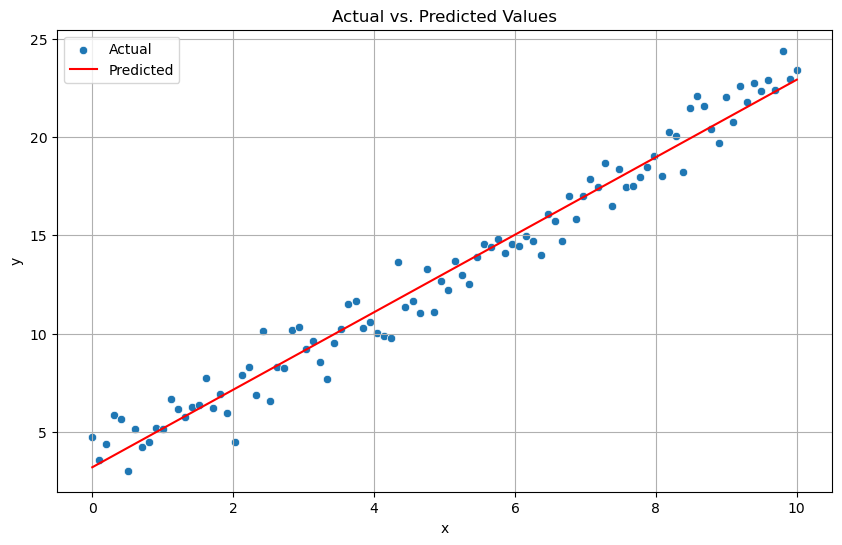

Root Mean Squared Error (RMSE): 1.0041468286404227
R-squared: 0.9703537814132044


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

# Define the equation to be analyzed
def equation(x, a, b):
    return a * x + b

# Generate sample data
np.random.seed(0)
x_data = np.linspace(0, 10, 100)
y_data = 2 * x_data + 3 + np.random.normal(0, 1, 100)

# Define the objective function for optimization
def objective(params, x, y):
    a, b = params
    y_pred = equation(x, a, b)
    return np.sum((y - y_pred) ** 2)

# Initial guess for parameters
initial_guess = [1, 1]

# Perform optimization to find the best parameters
result = minimize(objective, initial_guess, args=(x_data, y_data))
best_params = result.x

# Analyze the results
a_opt, b_opt = best_params

# Calculate the predicted values
y_pred = equation(x_data, a_opt, b_opt)

# Create a DataFrame to store the results
results_df = pd.DataFrame({'x': x_data, 'y_actual': y_data, 'y_predicted': y_pred})

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='x', y='y_actual', label='Actual')
sns.lineplot(data=results_df, x='x', y='y_predicted', color='red', label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Calculate statistics
rmse = np.sqrt(np.mean((y_data - y_pred) ** 2))
r_squared = 1 - (np.sum((y_data - y_pred) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2))

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)

In [5]:
import pandas as pd
import statsmodels.api as sm
import numpy as np 

# Load data
data = pd.read_csv("base_ESP B.csv")  # Replace "your_data_file.csv" with the actual file path
np.asarray(data)
# Define independent variables for each specification
independent_variables_r1 = data[[ 'aab', 'SUPERFICIE', 'DESEMPLEO', 'PRECIPIT', 'VE TO',
       'VE MO', 'POP', 'MOTOR', 'CONDUCTORES_MASC', 'CONDUCTORES_FEM',
       'CONDUCTORES_TOT', 'ING_CIVIL_ÍNDICE', 'PIB_CAP', 'IPC', 'MUERTOS',
       'HG', 'HL', 'COD_PENAL', 'DPS_MOD', 'VELOCIDAD_MOD', 'ITV_MOD',
       'INFRACCIONES', 'VEL_MOTORWA', 'VEL_RURAL', 'PTW_VKM', 'LIGEROS_VKM',
       'PESADOS_VKM', 'EDAD_MEDIANA', 'GAS_PRECIO_CORR', 'GAS_PRECIO_CTE',
       'RCE_MOTORWA', 'RCE_RURAL', 'RCE_TOTAL', 'RCE_PROP_MOTORWA', 'INV_CONS',
       'INV_MAINT', 'INV_CONS_KM', 'INV_MAINT_KM', 'MAINT_T2_200',
       'STOCK_T10_150', 'STOCK_T10_175', 'STOCK_T10_200', 'STOCK_T10_225',
       'STOCK_T10_250', 'STOCK_T5_200', 'STO9_200', 'STO8_200', 'STO9_100',
       'STO9_300', 'CAP10_200', 'CAP9_200', 'CAP8_200', 'CAP9_100',
       'CAP9_300' ]]
independent_variables_r2 = data[[ 'aab', 'SUPERFICIE', 'DESEMPLEO', 'PRECIPIT', 'VE TO',
       'VE MO', 'POP', 'MOTOR', 'CONDUCTORES_MASC', 'CONDUCTORES_FEM',
       'CONDUCTORES_TOT', 'ING_CIVIL_ÍNDICE', 'PIB_CAP', 'IPC', 'MUERTOS',
       'HG', 'HL', 'COD_PENAL', 'DPS_MOD', 'VELOCIDAD_MOD', 'ITV_MOD',
       'INFRACCIONES', 'VEL_MOTORWA', 'VEL_RURAL', 'PTW_VKM', 'LIGEROS_VKM',
       'PESADOS_VKM', 'EDAD_MEDIANA', 'GAS_PRECIO_CORR', 'GAS_PRECIO_CTE',
       'RCE_MOTORWA', 'RCE_RURAL', 'RCE_TOTAL', 'RCE_PROP_MOTORWA', 'INV_CONS',
       'INV_MAINT', 'INV_CONS_KM', 'INV_MAINT_KM', 'MAINT_T2_200',
       'STOCK_T10_150', 'STOCK_T10_175', 'STOCK_T10_200', 'STOCK_T10_225',
       'STOCK_T10_250', 'STOCK_T5_200', 'STO9_200', 'STO8_200', 'STO9_100',
       'STO9_300', 'CAP10_200', 'CAP9_200', 'CAP8_200', 'CAP9_100',
       'CAP9_300' ]]
independent_variables_r3 = data[[ 'aab', 'SUPERFICIE', 'DESEMPLEO', 'PRECIPIT', 'VE TO',
       'VE MO', 'POP', 'MOTOR', 'CONDUCTORES_MASC', 'CONDUCTORES_FEM',
       'CONDUCTORES_TOT', 'ING_CIVIL_ÍNDICE', 'PIB_CAP', 'IPC', 'MUERTOS',
       'HG', 'HL', 'COD_PENAL', 'DPS_MOD', 'VELOCIDAD_MOD', 'ITV_MOD',
       'INFRACCIONES', 'VEL_MOTORWA', 'VEL_RURAL', 'PTW_VKM', 'LIGEROS_VKM',
       'PESADOS_VKM', 'EDAD_MEDIANA', 'GAS_PRECIO_CORR', 'GAS_PRECIO_CTE',
       'RCE_MOTORWA', 'RCE_RURAL', 'RCE_TOTAL', 'RCE_PROP_MOTORWA', 'INV_CONS',
       'INV_MAINT', 'INV_CONS_KM', 'INV_MAINT_KM', 'MAINT_T2_200',
       'STOCK_T10_150', 'STOCK_T10_175', 'STOCK_T10_200', 'STOCK_T10_225',
       'STOCK_T10_250', 'STOCK_T5_200', 'STO9_200', 'STO8_200', 'STO9_100',
       'STO9_300', 'CAP10_200', 'CAP9_200', 'CAP8_200', 'CAP9_100',
       'CAP9_300' ]]
independent_variables_r4 = data[[ 'aab', 'SUPERFICIE', 'DESEMPLEO', 'PRECIPIT', 'VE TO',
       'VE MO', 'POP', 'MOTOR', 'CONDUCTORES_MASC', 'CONDUCTORES_FEM',
       'CONDUCTORES_TOT', 'ING_CIVIL_ÍNDICE', 'PIB_CAP', 'IPC', 'MUERTOS',
       'HG', 'HL', 'COD_PENAL', 'DPS_MOD', 'VELOCIDAD_MOD', 'ITV_MOD',
       'INFRACCIONES', 'VEL_MOTORWA', 'VEL_RURAL', 'PTW_VKM', 'LIGEROS_VKM',
       'PESADOS_VKM', 'EDAD_MEDIANA', 'GAS_PRECIO_CORR', 'GAS_PRECIO_CTE',
       'RCE_MOTORWA', 'RCE_RURAL', 'RCE_TOTAL', 'RCE_PROP_MOTORWA', 'INV_CONS',
       'INV_MAINT', 'INV_CONS_KM', 'INV_MAINT_KM', 'MAINT_T2_200',
       'STOCK_T10_150', 'STOCK_T10_175', 'STOCK_T10_200', 'STOCK_T10_225',
       'STOCK_T10_250', 'STOCK_T5_200', 'STO9_200', 'STO8_200', 'STO9_100',
       'STO9_300', 'CAP10_200', 'CAP9_200', 'CAP8_200', 'CAP9_100',
       'CAP9_300' ]]
independent_variables_r5 = data[[ 'aab', 'SUPERFICIE', 'DESEMPLEO', 'PRECIPIT', 'VE TO',
       'VE MO', 'POP', 'MOTOR', 'CONDUCTORES_MASC', 'CONDUCTORES_FEM',
       'CONDUCTORES_TOT', 'ING_CIVIL_ÍNDICE', 'PIB_CAP', 'IPC', 'MUERTOS',
       'HG', 'HL', 'COD_PENAL', 'DPS_MOD', 'VELOCIDAD_MOD', 'ITV_MOD',
       'INFRACCIONES', 'VEL_MOTORWA', 'VEL_RURAL', 'PTW_VKM', 'LIGEROS_VKM',
       'PESADOS_VKM', 'EDAD_MEDIANA', 'GAS_PRECIO_CORR', 'GAS_PRECIO_CTE',
       'RCE_MOTORWA', 'RCE_RURAL', 'RCE_TOTAL', 'RCE_PROP_MOTORWA', 'INV_CONS',
       'INV_MAINT', 'INV_CONS_KM', 'INV_MAINT_KM', 'MAINT_T2_200',
       'STOCK_T10_150', 'STOCK_T10_175', 'STOCK_T10_200', 'STOCK_T10_225',
       'STOCK_T10_250', 'STOCK_T5_200', 'STO9_200', 'STO8_200', 'STO9_100',
       'STO9_300', 'CAP10_200', 'CAP9_200', 'CAP8_200', 'CAP9_100',
       'CAP9_300' ]]

# Define dependent variable
dependent_variable = data['ACC']

# Perform negative binomial regression for each specification
model_r1 = sm.GLM(dependent_variable, independent_variables_r1, family=sm.families.NegativeBinomial()).fit()
model_r2 = sm.GLM(dependent_variable, independent_variables_r2, family=sm.families.NegativeBinomial()).fit()
model_r3 = sm.GLM(dependent_variable, independent_variables_r3, family=sm.families.NegativeBinomial()).fit()
model_r4 = sm.GLM(dependent_variable, independent_variables_r4, family=sm.families.NegativeBinomial()).fit()
model_r5 = sm.GLM(dependent_variable, independent_variables_r5, family=sm.families.NegativeBinomial()).fit()

# Print summary of regression results
print("Model r1:")
print(model_r1.summary())
print("\nModel r2:")
print(model_r2.summary())
print("\nModel r3:")
print(model_r3.summary())
print("\nModel r4:")
print(model_r4.summary())
print("\nModel r5:")
print(model_r5.summary())


C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter 

Model r1:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    ACC   No. Observations:                  560
Model:                            GLM   Df Residuals:                      508
Model Family:        NegativeBinomial   Df Model:                           51
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2355.4
Date:                Tue, 26 Mar 2024   Deviance:                       73.749
Time:                        03:12:09   Pearson chi2:                     64.9
No. Iterations:                    31   Pseudo R-squ. (CS):             0.6243
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
aab                  0.0093   

In [6]:
# Define variables (similar to your rfin, PTW_VKM, VEL_RURAL, etc.)
rfin = ['aab', 'STO9_200', 'INV_CONS', 'INV_MAINT', 'LIGEROS_VKM', 'PESADOS_VKM', 'PIB_CAP', 'GAS_PRECIO_CORR']

# Fit the Negative Binomial regression model
model = sm.GLM(data['MUERTOS'], data[rfin + ['PTW_VKM', 'VEL_RURAL']], family=sm.families.NegativeBinomial()).fit()

# Get model summary
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                MUERTOS   No. Observations:                  560
Model:                            GLM   Df Residuals:                      550
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1051.4
Date:                Tue, 26 Mar 2024   Deviance:                       406.60
Time:                        03:12:48   Pearson chi2:                     333.
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1921
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
aab                 0.0013      0.000     

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [8]:
import pandas as pd
import statsmodels.api as sm

# Load your dataset
data = pd.read_csv('base_ESP B.csv')

# Extract relevant columns (replace with actual column names)
independent_variables = ['aab', 'SUPERFICIE', 'DESEMPLEO', 'PRECIPIT', 'VE TO',
       'VE MO', 'POP', 'MOTOR', 'CONDUCTORES_MASC', 'CONDUCTORES_FEM',
       'CONDUCTORES_TOT', 'ING_CIVIL_ÍNDICE', 'PIB_CAP', 'IPC', 'MUERTOS',
       'HG', 'HL','COD_PENAL', 'DPS_MOD', 'VELOCIDAD_MOD', 'ITV_MOD',
       'INFRACCIONES', 'VEL_MOTORWA', 'VEL_RURAL', 'PTW_VKM', 'LIGEROS_VKM',
       'PESADOS_VKM', 'EDAD_MEDIANA', 'GAS_PRECIO_CORR', 'GAS_PRECIO_CTE',
       'RCE_MOTORWA', 'RCE_RURAL', 'RCE_TOTAL', 'RCE_PROP_MOTORWA', 'INV_CONS',
       'INV_MAINT', 'INV_CONS_KM', 'INV_MAINT_KM', 'MAINT_T2_200',
       'STOCK_T10_150', 'STOCK_T10_175', 'STOCK_T10_200', 'STOCK_T10_225',
       'STOCK_T10_250', 'STOCK_T5_200', 'STO9_200', 'STO8_200', 'STO9_100',
       'STO9_300', 'CAP10_200', 'CAP9_200', 'CAP8_200', 'CAP9_100',
       'CAP9_300']  # Add all your features here
dependent_variable = 'ACC'

# Create feature matrix X and target vector y
X = data[independent_variables]
y = data[dependent_variable]

# Fit Negative Binomial regression
model = sm.GLM(y, sm.add_constant(X), family=sm.families.NegativeBinomial())
results = model.fit()

# Get model summary
print(results.summary())

# Perform Likelihood Ratio Test
lrt_p_value = results.compare_lr_test(restricted_model=sm.GLM(y, sm.add_constant(X), family=sm.families.Poisson())).pvalue
print(f"LRT p-value: {lrt_p_value}")

# Calculate AIC and BIC
aic = results.aic
bic = results.bic
print(f"AIC: {aic}, BIC: {bic}")

# Make predictions
predicted_values = results.predict(sm.add_constant(X))

# Calculate prediction accuracy metrics (e.g., MAD, RMSE)
mad = (y - predicted_values).abs().mean()
rmse = ((y - predicted_values) ** 2).mean() ** 0.5
print(f"Prediction Accuracy (MAD): {mad:.2f}, RMSE: {rmse:.2f}")

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    ACC   No. Observations:                  560
Model:                            GLM   Df Residuals:                      507
Model Family:        NegativeBinomial   Df Model:                           52
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2355.4
Date:                Tue, 26 Mar 2024   Deviance:                       73.748
Time:                        03:15:34   Pearson chi2:                     64.9
No. Iterations:                    48   Pseudo R-squ. (CS):             0.6243
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -9.0755    288.046  

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


AttributeError: 'GLMResults' object has no attribute 'compare_lr_test'

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('base_ESP B.csv')

# Select independent and dependent variables
independent_variables = ['aab', 'SUPERFICIE', 'DESEMPLEO', 'PRECIPIT', 'VE TO',
       'VE MO', 'POP', 'MOTOR', 'CONDUCTORES_MASC', 'CONDUCTORES_FEM',
       'CONDUCTORES_TOT', 'ING_CIVIL_ÍNDICE', 'PIB_CAP', 'IPC', 'MUERTOS',
       'HG', 'HL','COD_PENAL', 'DPS_MOD', 'VELOCIDAD_MOD', 'ITV_MOD',
       'INFRACCIONES', 'VEL_MOTORWA', 'VEL_RURAL', 'PTW_VKM', 'LIGEROS_VKM',
       'PESADOS_VKM', 'EDAD_MEDIANA', 'GAS_PRECIO_CORR', 'GAS_PRECIO_CTE',
       'RCE_MOTORWA', 'RCE_RURAL', 'RCE_TOTAL', 'RCE_PROP_MOTORWA', 'INV_CONS',
       'INV_MAINT', 'INV_CONS_KM', 'INV_MAINT_KM', 'MAINT_T2_200',
       'STOCK_T10_150', 'STOCK_T10_175', 'STOCK_T10_200', 'STOCK_T10_225',
       'STOCK_T10_250', 'STOCK_T5_200', 'STO9_200', 'STO8_200', 'STO9_100',
       'STO9_300', 'CAP10_200', 'CAP9_200', 'CAP8_200', 'CAP9_100',
       'CAP9_300']
dependent_variable = 'ACC'

X = df[independent_variables]
y = df[dependent_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Print out coefficients
coefficients = pd.Series(model.coef_, index=independent_variables)
print("Coefficients:")
print(coefficients)

# Evaluate model performance (you can use other metrics as well)
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared:.2f}")


Coefficients:
aab                -1.028883e+00
SUPERFICIE          3.124483e-04
DESEMPLEO          -4.344577e-02
PRECIPIT            1.261491e-03
VE TO              -1.310094e-05
VE MO              -1.227565e-05
POP                 2.008831e-05
MOTOR               2.026018e-03
CONDUCTORES_MASC   -6.083301e-05
CONDUCTORES_FEM     3.020984e-06
CONDUCTORES_TOT     1.698936e-05
ING_CIVIL_ÍNDICE    3.760274e-01
PIB_CAP             1.458825e-04
IPC                -9.923729e-01
MUERTOS             6.130895e-01
HG                  7.512532e-01
HL                  8.514183e-01
COD_PENAL          -2.740229e+00
DPS_MOD            -6.996030e-01
VELOCIDAD_MOD      -5.843738e-01
ITV_MOD            -3.953033e-01
INFRACCIONES        9.086981e-07
VEL_MOTORWA        -8.134073e-02
VEL_RURAL          -1.886150e-03
PTW_VKM            -9.013892e-03
LIGEROS_VKM        -1.080633e-04
PESADOS_VKM        -2.341571e-03
EDAD_MEDIANA        1.000146e-01
GAS_PRECIO_CORR     9.952943e-01
GAS_PRECIO_CTE     -1.050722e

In [11]:
import pandas as pd

# Load your dataset (replace 'base_ESP B.csv' with the actual file path)
df = pd.read_csv('base_ESP B.csv')

# Select the relevant columns (replace with your actual column names)
columns_of_interest = ['aab', 'SUPERFICIE', 'DESEMPLEO', 'PRECIPIT', 'VE TO',
       'VE MO', 'POP', 'MOTOR', 'CONDUCTORES_MASC', 'CONDUCTORES_FEM',
       'CONDUCTORES_TOT', 'ING_CIVIL_ÍNDICE', 'PIB_CAP', 'IPC', 'MUERTOS',
       'HG', 'HL','COD_PENAL', 'DPS_MOD', 'VELOCIDAD_MOD', 'ITV_MOD',
       'INFRACCIONES', 'VEL_MOTORWA', 'VEL_RURAL', 'PTW_VKM', 'LIGEROS_VKM',
       'PESADOS_VKM', 'EDAD_MEDIANA', 'GAS_PRECIO_CORR', 'GAS_PRECIO_CTE',
       'RCE_MOTORWA', 'RCE_RURAL', 'RCE_TOTAL', 'RCE_PROP_MOTORWA', 'INV_CONS',
       'INV_MAINT', 'INV_CONS_KM', 'INV_MAINT_KM', 'MAINT_T2_200',
       'STOCK_T10_150', 'STOCK_T10_175', 'STOCK_T10_200', 'STOCK_T10_225',
       'STOCK_T10_250', 'STOCK_T5_200', 'STO9_200', 'STO8_200', 'STO9_100',
       'STO9_300', 'CAP10_200', 'CAP9_200', 'CAP8_200', 'CAP9_100',
       'CAP9_300']

# Calculate descriptive statistics
summary_stats = df[columns_of_interest].describe()

# Print the summary statistics
print(summary_stats)


               aab    SUPERFICIE   DESEMPLEO     PRECIPIT         VE TO  \
count   560.000000    560.000000  560.000000   560.000000  5.600000e+02   
mean   2011.989286  11066.112500   18.229295   537.130536  6.273189e+05   
std       3.750238   4327.555177    7.926284   296.682686  8.180443e+05   
min    2006.000000   4495.000000    3.032500   126.600000  6.277300e+04   
25%    2009.000000   7440.000000   12.149375   349.325000  2.278902e+05   
50%    2012.000000  10561.000000   17.627500   453.550000  3.937500e+05   
75%    2015.000000  14292.000000   23.575625   612.575000  6.555600e+05   
max    2018.000000  21766.000000   42.307500  2176.000000  4.891178e+06   

               VE MO           POP        MOTOR  CONDUCTORES_MASC  \
count     560.000000  5.600000e+02   560.000000      5.600000e+02   
mean    57282.412500  9.411561e+05   694.073058      3.124443e+05   
std     91416.091189  1.237991e+06   150.014946      3.731859e+05   
min      2878.000000  8.860000e+04   202.059910 